In [ ]:
# If needed in Colab:
# !pip install statsmodels

import numpy as np
## numpy is the package for doing math 
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pandas.plotting import scatter_matrix

np.random.seed(8675309)
## random seed for reproducibility




Summary of dat:
                x1           x2           x3            y
count  1000.000000  1000.000000  1000.000000  1000.000000
mean      6.985207     3.424689     3.453440    47.270665
std       2.992218     6.893406     6.929934    32.475807
min      -1.071681   -18.417960   -18.173151   -60.680974
25%       5.095901    -1.036071    -0.986788    24.775333
50%       7.132485     3.385617     3.431537    46.309319
75%       8.952404     7.827421     7.891996    70.109359
max      19.041411    24.737906    24.976379   135.454910


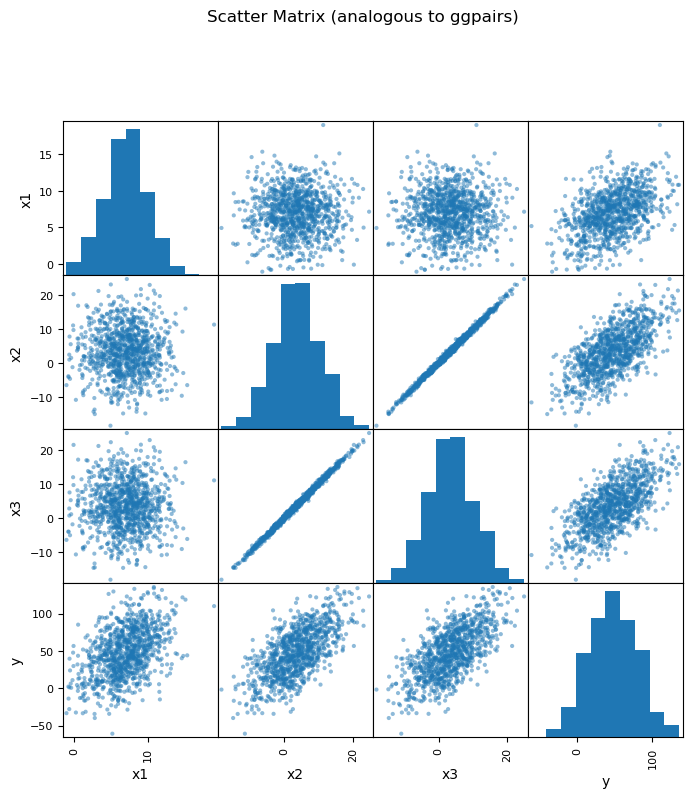

In [2]:
# -------------------------------------------------------------------
# Create data  (analogous to your R tibble)
# -------------------------------------------------------------------
n = 1000

x1 = np.random.normal(loc=7, scale=3, size=n)
x2 = np.random.normal(loc=3, scale=7, size=n)
x3 = x2 + np.random.normal(loc=0, scale=0.5, size=n)
## this means that x3 is highly correleated with x2
## loc is mean and scale is std dev

y  = 3 + 5 * x1 + 3 * x2 + np.random.normal(loc=0, scale=20, size=n) # note only x2 and x3

dat = pd.DataFrame({"x1": x1, "x2": x2, "x3": x3, "y": y})

print("Summary of dat:")
print(dat.describe())

# pairs plot
scatter_matrix(dat, figsize=(8, 8), diagonal="hist")
plt.suptitle("Scatter Matrix (analogous to ggpairs)", y=1.02)
plt.show()



In [3]:
# -------------------------------------------------------------------
# Helper function for VIF
# -------------------------------------------------------------------

# This function takes your fitted model as input
# It iterates across all variables
# And it produces a pandas data frame of VIFs for each variable
def vif_table(model):
    X = model.model.exog
    names = model.model.exog_names
    vif_values = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    return pd.DataFrame({"variable": names, "VIF": vif_values})



In [ ]:
# -------------------------------------------------------------------
# Fit a model with all variables: y ~ x1 + x2 + x3
# -------------------------------------------------------------------
X = dat.drop("y", axis=1)

y = dat["y"]


f1 = sm.OLS(y, sm.add_constant(X)).fit()

print("\nFull model summary (f1: y ~ x1 + x2 + x3):")
print(f1.summary())



In [ ]:
# -------------------------------------------------------------------
# Diagnostic plots
# -------------------------------------------------------------------
# Rough analog to plot(f1) – residuals vs fitted and QQ-plot
plt.figure(figsize=(6, 4))
plt.scatter(f1.fittedvalues, f1.resid, alpha=0.5)
plt.axhline(0, color="k", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (f1)")
plt.show()


# QQ plot to assess normality
sm.qqplot(f1.resid, line="s")
plt.title("QQ-plot of Residuals (f1)")
plt.show()

# VIF for full model
print("\nVIF for full model (f1):")
print(vif_table(f1))



In [ ]:
# -------------------------------------------------------------------
# Fit two models with x2 or x3, but not both
# -------------------------------------------------------------------

# 1) y ~ x1 + x2
f_nmc_1 = sm.OLS(y, sm.add_constant(dat[["x1", "x2"]])).fit()


print("\nModel without x3 (f_nmc_1: y ~ x1 + x2):")
print(f_nmc_1.summary())

# diagnostic plots again
plt.figure(figsize=(6, 4))
plt.scatter(f_nmc_1.fittedvalues, f_nmc_1.resid, alpha=0.5)
plt.axhline(0, color="k", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (f_nmc_1)")
plt.show()

sm.qqplot(f_nmc_1.resid, line="s")
plt.title("QQ-plot of Residuals (f_nmc_1)")
plt.show()

print("\nVIF for model f_nmc_1 (y ~ x1 + x2):")
print(vif_table(f_nmc_1))



In [ ]:
# 2) y ~ x1 + x3
f_nmc_2 = sm.OLS(y, sm.add_constant(dat[["x1", "x3"]])).fit()


print("\nModel without x2 (f_nmc_2: y ~ x1 + x3):")
print(f_nmc_2.summary())

plt.figure(figsize=(6, 4))
plt.scatter(f_nmc_2.fittedvalues, f_nmc_2.resid, alpha=0.5)
plt.axhline(0, color="k", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (f_nmc_2)")
plt.show()

sm.qqplot(f_nmc_2.resid, line="s")
plt.title("QQ-plot of Residuals (f_nmc_2)")
plt.show()

print("\nVIF for model f_nmc_2 (y ~ x1 + x3):")
print(vif_table(f_nmc_2))
